# Part One: Network Models

### ** 1. Watts-Strogatz Networks**

<font color = "#018786"> * **Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p=0, 0.1, and 1.** *</font>

In [296]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import re
import io

In [297]:
k2 = 0.1 * 4999
N = 500
G1 = nx.watts_strogatz_graph(500, 4, 0)
G2 = nx.watts_strogatz_graph(500, 4, 0.1)
G3 = nx.watts_strogatz_graph(500, 4, 1)

<font color = "#018786"> * **Calculate the average shortest path length ⟨d⟩ for each one.** *</font>

In [298]:
d1 = nx.average_shortest_path_length(G1)
d2 = nx.average_shortest_path_length(G2)
d3 = nx.average_shortest_path_length(G3)

The average shortest path for *p = 0* is   **62.875751503**

The average shortest path for *p = 0.1* is **7.38149098196**

The average shortest path for *p = 1* is   **4.78541883768**

<font color = "#018786"> * **Describe what happens to the network when p=1** *</font>

When the probability of rewiring each edge is higher (p = 1), the rewiring creates shortcuts across the network and rapidly decreases the value of the average shortest path length.

<font color = "#018786"> * ** Generate 50 networks with N=500, ⟨k⟩=4, for each of p={0,0.01,0.03,0.05,0.1,0.2}. Calculate the average of ⟨d⟩ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot.** *</font>

In [299]:
ps = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

d = {}
std = []
mean_d = []
for p in ps:
    d[p] = []
    for i in range(50):
        G = nx.watts_strogatz_graph(500, 4, p)
        d[p].append(nx.average_shortest_path_length(G))
    std.append(np.std(d[p]))
    mean_d.append(np.average(d[p]))

Text(0,0.5,'average <d>')

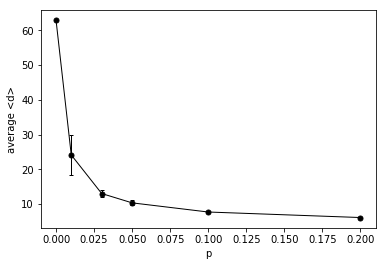

In [300]:
plt.errorbar(ps, mean_d, yerr=std, color='black', marker='o', linewidth=1, markersize=5, capsize=2)
plt.xlabel('p')
plt.ylabel('average <d>')

### ** 2. The Barabasi-Albert Model**

<font color = "#018786"> * ** Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.** *</font>

In [301]:
import random
import networkx as nx
from networkx.generators.classic import empty_graph, path_graph, complete_graph
import matplotlib.pyplot as plt
import collections
import numpy as np

def _random_subset(seq,m):
    """ Return m unique elements from seq.

    This differs from random.sample which can return repeated
    elements if seq holds repeated elements.
    """
    targets=set()
    while len(targets)<m:
        x=random.choice(seq)
        targets.add(x)
    return targets

In [302]:
def barabasi_albert(n, m, seed=None):
    # Add m initial nodes (m0 in barabasi-speak)
    G=empty_graph(m)
    G.name="barabasi_albert_graph(%s,%s)"%(n,m)
    # Target nodes for new edges
    targets=list(range(m))
    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes=[]
    # Start adding the other n-m nodes. The first node is m.
    source=m
    while source<n:
        # Add edges to m nodes from the source.
        G.add_edges_from(zip([source]*m,targets))
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend([source]*m)
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachement)
        targets = _random_subset(repeated_nodes,m)
        source += 1
    return G
n = 100
m0 = random.randint(2, n/5)
G = nx.path_graph(n)
G = barabasi_albert(n, m0)

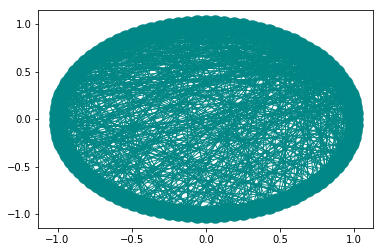

In [303]:
def display_graph(G, i, ne): #i is the new node added and ne is the list of new edges
    pos = nx.circular_layout(G)
    if i == '' and ne =='':
        rest_nodes = G.nodes()
        rest_edges = G.edges()
    nx.draw_networkx_nodes(G, pos, nodelist = rest_nodes, node_color = '#018786')
    nx.draw_networkx_edges(G, pos, edgelist = rest_edges, edge_color = '#018786')
    plt.show()
display_graph(G,'','')

max degree 42
min degree 1


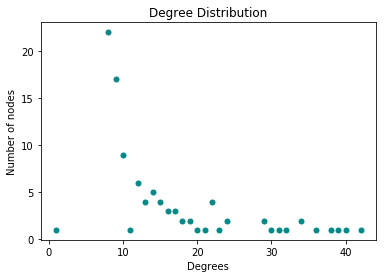

In [304]:
def plot_deg_dist(G):
    all_degrees = dict(nx.degree(G)).values() #all the degrees / taking all degrees
    print "max degree", max(all_degrees)
    print "min degree", min(all_degrees)
    unique_degrees = list(set(all_degrees)) #list of unique degrees
    unique_degrees.sort() #sort the list to plot it
    count_of_degrees = [] 
    
    for i in unique_degrees:
        c = all_degrees.count(i) #how many noodes with that degree
        count_of_degrees.append(c)
    #print unique_degrees
    #print count_of_degrees

    plt.plot(unique_degrees, count_of_degrees, 'o', color = '#018786', markersize=5) 
    
    plt.xlabel('Degrees')
    plt.ylabel('Number of nodes')
    plt.title('Degree Distribution')
    plt.show()
plot_deg_dist(G)

<font color = "#018786"> * **Now create a 5000 node network.** *</font>

In [305]:
n5 = 5000
m5 = random.randint(2, n5/5)
G5 = nx.path_graph(n5)
G5 = barabasi_albert(n5, m5)

<font color = "#018786"> * **What's the maximum and minimum degree? ** *</font>
<font color = "#018786"> * ** Now, bin the degree distribution, for example using numpy.histogram.** *</font>

max degree 3224
min degree 814


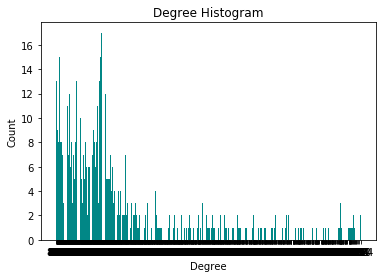

In [306]:
def bin_histogram(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    print "max degree", max(degree_sequence)
    print "min degree", min(degree_sequence)   
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    
    #numpy.histogram
    #plt.hist(G, bins='auto')
    
    #log-log axes
    '''plt.loglog(degree_sequence,'b-',marker='o')
    plt.title("Degree rank plot")
    plt.ylabel("degree")
    plt.xlabel("rank")'''
    
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='#018786')
        
    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)
    plt.show()
bin_histogram(G5) 

<font color = "#018786"> * **Plot the distribution. Plot it with both linear and log-log axes.** *</font>

max degree 3224
min degree 814


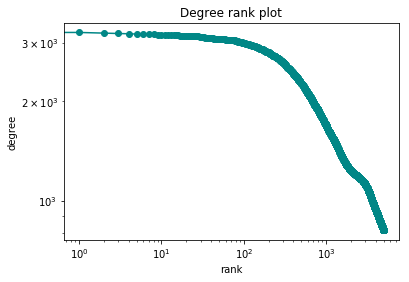

In [307]:
def log_log(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    print "max degree", max(degree_sequence)
    print "min degree", min(degree_sequence)   
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    
    #numpy.histogram
    #plt.hist(G, bins='auto')
    
    #log-log axes
    plt.loglog(degree_sequence,'b-',marker='o', color='#018786')
    plt.title("Degree rank plot")
    plt.ylabel("degree")
    plt.xlabel("rank")
    plt.show()
log_log(G5)

### ** 3. Power-laws and the friendship paradox**

Next step is to explore the Friendship paradox. This paradox states that almost everyone have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

<font color = "#018786"> * **Pick a node i at random. Find its degree.** *</font>

In [308]:
random_node = random.choice(list(G5.nodes))
print "The random node is: " + str(random_node)

The random node is: 1946


In [309]:
deg = G5.degree[random_node]
deg
print "The degree of the random node is: " + str(deg)

The degree of the random node is: 1627


<font color = "#018786"> * **Find i's neighbors. And calculate their average degree.** *</font>

<font color = "#018786"> * **Neighbors of the random node:** *</font> (please uncomment the print if you want to see them)

In [310]:
neighbors = list(G5.neighbors(random_node))
# print neighbors

<font color = "#018786"> * **Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.** *</font>

In [311]:
nodes_degrees = [G5.degree(node) for node in neighbors]
av_deg = 0
av_deg = sum([y for y in nodes_degrees])
average_degree = float(av_deg)/len(nodes_degrees)
print "The average degree of neighbors is: " + str(average_degree)
if deg < average_degree:
    print "It is true that the friends of the random node have more friends than it"
else: 
    print "The afirmation is incorrect for this case"


The average degree of neighbors is: 1544.54271666
The afirmation is incorrect for this case


The friendship paradox states that your friends have on average more friends than you have. Here, it is true that *i*'s friends (on average) have more friends than *i*. Therefore, the friendship paradox has been proved true.

<font color = "#018786"> * **Do this 1000 times. How many out of those 1000 times is the friendship paradox true?** *</font>

In [312]:
greater = 0
less = 0
for i in range(1000):
    random_node = random.choice(list(G5.nodes))
    deg = G5.degree[random_node]
    neighbors = list(G5.neighbors(random_node))
    nodes_degrees = [G5.degree(node) for node in neighbors]
    av_deg = 0
    av_deg = sum([y for y in nodes_degrees])
    a = av_deg/len(nodes_degrees)
    if deg > a:
        greater+= 1
    elif deg < a:
        less+= 1
print "greater: " + str(greater), "less: " + str(less)

greater: 228 less: 771


As seen above, the computed values show that around 700 out of 1000 times *i* has less friends than *i*'s friends. Thereby, the friendship paradox is **proven true**.

# Part Two: The network of American politics

### ** 4. Basic stats for pages over time**

Put together descriptive statistics for the US house of representatives over time (e.g. for the 113th, 114th and 115th congress).

<font color = "#018786"> * **Plot the number of members of the house of Representatives over time.** *</font>

In [313]:
import pandas as pd
import matplotlib.pylab as plt

In [314]:
df3 = pd.read_csv("H113.csv")
df3['congress_number'] = 113

df4 = pd.read_csv("H114.csv")
df4['congress_number'] = 114

df5 = pd.read_csv("H115.csv")
df5['congress_number'] = 115

In [315]:
all_members = pd.concat([df3, df4, df5]).reset_index(drop = True)

In [316]:
members = all_members.groupby('congress_number').size()
members

congress_number
113    444
114    442
115    445
dtype: int64

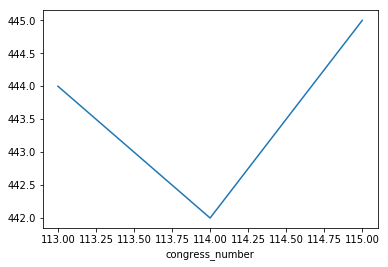

In [317]:
members.plot('line')
plt.show()

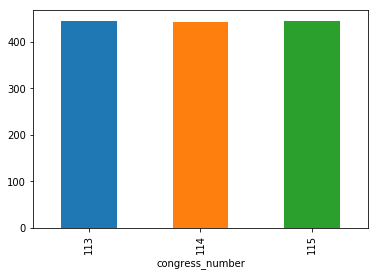

In [318]:
members.plot('bar')
plt.show()

<font color = "#018786"> * **Is this development over time what you would expect? Why? Explain in your own words.** *</font>

The development is what you would expect - over time, some politicians quit and others get newly elected. 

<font color = "#018786"> * **How many members appear in all the three congresses? How many in two? How many in one? Plot your results using a histogram.** *</font>

In [319]:
groups = all_members.groupby('WikiPageName')

In [320]:
for key, group in groups:
    print group
    break;

     WikiPageName       Party     State  congress_number
260  Aaron_Schock  Republican  Illinois              113
660  Aaron_Schock  Republican  Illinois              114


In [321]:
times_in_congress = groups.size().sort_values()

In [322]:
result = times_in_congress.groupby(times_in_congress).size()

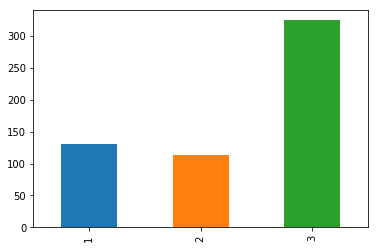

In [323]:
result.plot('bar')
plt.show()

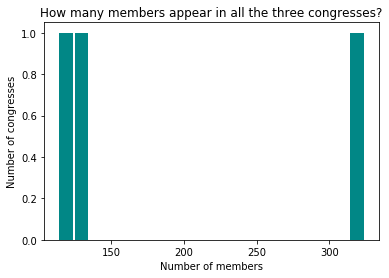

In [324]:
result.plot.hist(bins=20, rwidth=0.9, color='#018786')
plt.title('How many members appear in all the three congresses?')
plt.xlabel('Number of members')
plt.ylabel('Number of congresses')
plt.show()

<font color = "#018786"> * ** Which states are more represented in the house of representatives? Which are less? Plot a histogram showing the number of members per state.** *</font>

In [325]:
states = all_members.groupby('State').size().sort_values()
type(states)
states[-10:]

State
North Carolina     40
Michigan           42
Georgia            43
Ohio               50
Illinois           55
Pennsylvania       56
New York           82
Florida            83
Texas             109
California        160
dtype: int64

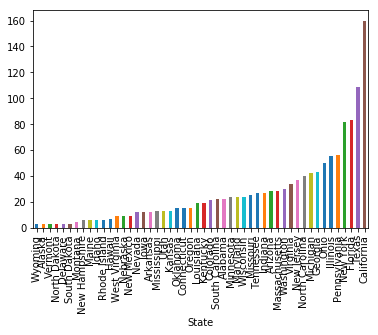

In [326]:
states.plot('bar')
plt.show()

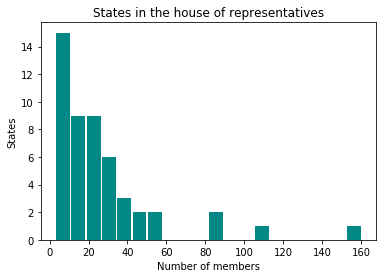

In [327]:
states.plot.hist(bins=20, rwidth=0.9, color='#018786')
plt.title('States in the house of representatives')
plt.xlabel('Number of members')
plt.ylabel('States')
plt.show()

<font color = "#018786"> * ** How has the party composition of the house of representative changed over time? Plot your results.** *</font>

In [328]:
party = all_members.groupby(['Party','congress_number']).size()
party

Party       congress_number
Democratic  113                204
            114                190
            115                196
Republican  113                240
            114                252
            115                249
dtype: int64

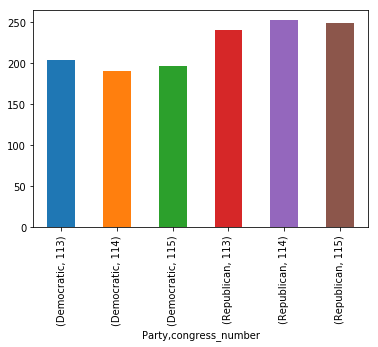

In [329]:
party.plot('bar')
plt.show()

### ** 5. Basic stats for the network**

**The following part is the part where the pages of the politicians are retrieved and saved as files on the personal computer in the "/files" folder**

In [330]:
baseurl = "http://en.wikipedia.org/w/api.php/?"
action = "action=query"
content = "prop=revisions"
rvprop ="rvprop=timestamp|content"
dataformat = "format=json"
rvdir = "rvdir=older" #sort revisions from newest to oldest
start = "rvend=2000-01-03T00:00:00Z" #start of my time period
end = "rvstart=2015-01-03T00:00:00Z" #end of my time period
limit = "rvlimit=1" #consider only the first revision

In [331]:
title = []
query={}
for key,name in enumerate(df3['WikiPageName']):
    title.append("titles="+name)
    
for key,name in enumerate(df3['WikiPageName']):
    query[key] = "%s%s&%s&%s&%s&%s&%s&%s&%s&%s" % (baseurl, action, title[key], content, rvprop, dataformat, rvdir, end, start, limit)

In [332]:
import urllib2

page = []
response = []
for k,q in query.iteritems():
    response.append(urllib2.urlopen(q))
    page.append(response[k].read())

error: [Errno 54] Connection reset by peer

In [ ]:
for k,politicianName in enumerate(df3['WikiPageName']):
    file = open("./files/"+politicianName+".txt", "w")
    file.write(page[k])
    file.close()

<font color = "#018786"> * **Create simple network statistics for the 113th house of representatives.** *</font>

In [ ]:
df = pd.read_csv("H113.csv", encoding = "utf-8")
sorted_df = df.WikiPageName.sort_values()

In [ ]:
# dictionary with [key = name of the politician] and [value = list of links to others pages]
cleaned_links = {}

#just make a copy (dunno if needed)
copy_sorted_df4 = sorted_df
# keep only the clean name, with spaces instead of "_" and without things in "()"
copy_sorted_df4 = [item.split("(", 1)[0].replace("_", " ") for item in copy_sorted_df4]

# for a politician in the list of politicians(nodes)
for value in sorted_df:
    
    path_folder = "./files/"

    f = io.open(path_folder+value+".txt", "r", encoding = "utf-8").read()

    links = re.findall("\[\[(.*?)\]\]", f)
  
    # the list of links from a politician's page, that point to other politicians pages
    list_of_links = []
    for link in links:
        for politician in sorted_df:
            if (politician.split("(", 1)[0].replace("_", " ") in link.split("|")[0]) & ("File" not in link):
                if politician not in list_of_links:
                    list_of_links.append(politician)
    cleaned_links[value] = list_of_links

In [ ]:
G = nx.DiGraph()

Add the nodes

In [ ]:
import csv
for node in cleaned_links.keys():
    state = None
    party = None
    if not df.loc[df.WikiPageName == node].State.empty:
        state = df.loc[df.WikiPageName == node].State.tolist()[0]
    if not df.loc[df.WikiPageName == node].Party.empty:
        party = df.loc[df.WikiPageName == node].Party.tolist()[0]
    G.add_node(node, party = party , state = party)
G.nodes['Mark_Amodei']

Add the edges

In [ ]:
for k, v in cleaned_links.items():
    G.add_edges_from(([(k, t) for t in v]))

Plot the graph

In [ ]:
nx.draw_kamada_kawai(G,node_size=10,node_color = '#018786', arrowsize = 5, width=0.2)

<font color = "#018786"> * **What is the number of nodes in the network? And the number of links?** *</font>

In [ ]:
print "The number of nodes is: " + str(len(G.nodes()))

In [ ]:
print "The number of edges is: " + str(len(G.edges()))

<font color = "#018786"> * **Plot the in and out degree distribution** *</font>

In [ ]:
import collections
in_degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  # degree sequence
inDegreeCount = collections.Counter(in_degree_sequence)
deg, cnt = zip(*inDegreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, color='#018786')
plt.title("In Degree Histogram")
plt.ylabel("Count")
plt.xlabel("In Degree")

In [ ]:
out_degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)  # degree sequence
outDegreeCount = collections.Counter(out_degree_sequence)
deg, cnt = zip(*outDegreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, color='#018786')
plt.title("Out Degree Histogram")
plt.ylabel("Count")
plt.xlabel(" OutDegree")

<font color = "#018786"> * **Most connected representative** *</font>

In [ ]:
deg_centrality = nx.degree_centrality(G)
sorted(deg_centrality.items(), key=lambda x:x[1], reverse=True)[:10]

The most connected representative is **Nancy Pelosi**.